Using the wordcloud library, make a word cloud, not a really useful data visualization, but it is a way to get a summary of headlines from the "description" column

In [4]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def create_cloud(readFile,stopwordList): 
    stopwords = set(STOPWORDS)
#     stopwordList is a text file of words to remove from word cloud, can be changed to fit user's need
    with open(stopwordList) as words:
            stopwords_raw = words.read()
            stopwords_raw=stopwords_raw.replace('"',"")
            stopword_list = stopwords_raw.split(",")
    stopwords.update(stopword_list)
    df = pd.read_csv(readFile, index_col=0)
    text = " ".join(str(article) for article in df["description"])
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("wordcloudy.png")

NewsAPI documentation:https://newsapi.org/docs
change authkey to own key
This creates a wordcloud with filtered words from the headlines
Also creates a "Output.csv" of the news headlines.


Cyber
attacks


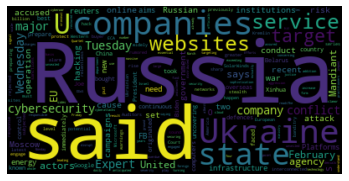

In [6]:
import json
import pandas as pd
from io import StringIO
from newsapi import NewsApiClient
authkey="158e8108f1124708bd7ddeba7384a4d0"
api=NewsApiClient(authkey)
topic="Cyber attacks"
response=api.get_everything(q=topic)
response_json_output=json.dumps(response)
response_dict=json.loads(response_json_output)
article_list=response_dict["articles"]
df=pd.read_json(StringIO(json.dumps(article_list)))
df.to_csv(f"Output.csv", encoding="utf_8_sig")
for word in topic.split():
    print(word)
    STOPWORDS.add(word)
create_cloud("Output.csv","stopwordlist")
